In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dataset prepared and scaled.")

✅ Dataset prepared and scaled.


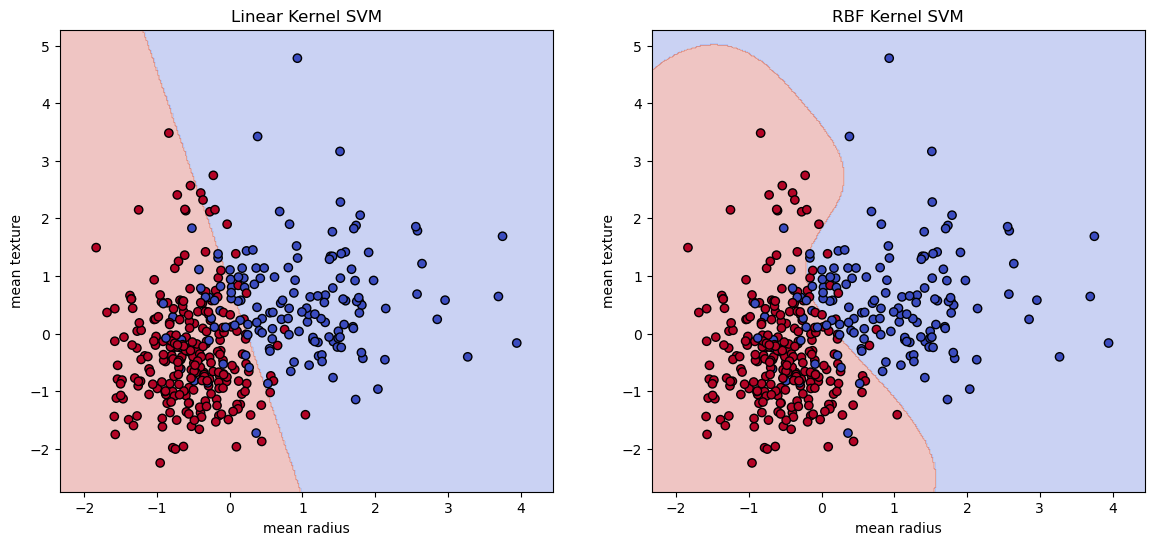

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# --- Prepare 2D data for visualization ---
X_2d = X_train_scaled[:, :2]
y_2d = y_train

# --- Train two SVM models ---
# 1. Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_2d, y_2d)

# 2. RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', gamma=0.5, C=1.0, random_state=42)
rbf_svm.fit(X_2d, y_2d)

# --- Function to plot decision boundaries ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel(cancer.feature_names[0])
    plt.ylabel(cancer.feature_names[1])

# --- Plot the boundaries side-by-side ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svm, X_2d, y_2d, "Linear Kernel SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svm, X_2d, y_2d, "RBF Kernel SVM")
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the grid of parameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)

# Fit it to the FULL (not just 2D) scaled training data
grid_search.fit(X_train_scaled, y_train)

# --- Print the best parameters and score ---
print("\n--- Hyperparameter Tuning Results ---")
print("Best Parameters found by Grid Search:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.3f}")

# --- Evaluate the best model on the test set ---
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

print("\n--- Final Evaluation on Test Set ---")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01